# Train in windows, returning only the last result of the sequence

In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_on_training(txt, max_epochs=100, max_loss=5, batch_size=380):
    loss = re.findall('- loss: \d+\.\d+', txt)
    accuracy = re.findall('- acc: \d+\.\d+', txt)
    val_loss = re.findall('- val_loss: \d+\.\d+', txt)
    val_accuracy = re.findall('- val_acc: \d+\.\d+', txt)

    loss = np.array([float(x[8:]) for x in loss], dtype=np.float32)
    accuracy = np.array([float(x[7:]) for x in accuracy], dtype=np.float32)
    val_loss = np.array([float(x[12:]) for x in val_loss], dtype=np.float32)
    val_accuracy = np.array([float(x[11:]) for x in val_accuracy], dtype=np.float32)
    
    t = np.arange(1, len(val_loss)+1).astype(np.int64)
    fig, ax1 = plt.subplots(figsize=(18, 10), dpi=100)
    ax1.plot(t, loss[(batch_size-1)::batch_size], 'b-')
    ax1.plot(t, val_loss, 'b-.')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss', color='b')
    ax1.set_xlim([0,max_epochs])
    ax1.set_ylim([0,max_loss])
    for tl in ax1.get_yticklabels():
        tl.set_color('b')

    ax2 = ax1.twinx()
    ax2.plot(t, accuracy[(batch_size-1)::batch_size], 'r-')
    ax2.plot(t, val_accuracy, 'r-.')
    ax2.set_ylabel('Accuracy', color='r')
    ax2.set_xlim([0,max_epochs])
    ax2.set_ylim([0, 1])
    for tl in ax2.get_yticklabels():
        tl.set_color('r')
    plt.show()

# Experiment 1

Only with video features, train with sequence of 20 and return at the end the probability of each activity during each sequence. The network is 1x512LSTM

```
nb_experiment: 1
batch_size: 256
timesteps: 20
epochs: 100
learning rate: 1e-05

Compiling model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
====================================================================================================
video_features (InputLayer)      (256, 20, 4096)       0                                            
____________________________________________________________________________________________________
video_features_normalization (Bat(256, 20, 4096)       8192        video_features[0][0]             
____________________________________________________________________________________________________
dropout_1 (Dropout)              (256, 20, 4096)       0           video_features_normalization[0][0
____________________________________________________________________________________________________
lstm1 (LSTM)                     (256, 512)            9439232     dropout_1[0][0]                  
____________________________________________________________________________________________________
activity_detection (Dense)       (256, 201)            103113      lstm1[0][0]                      
====================================================================================================
Total params: 9550537
____________________________________________________________________________________________________
```

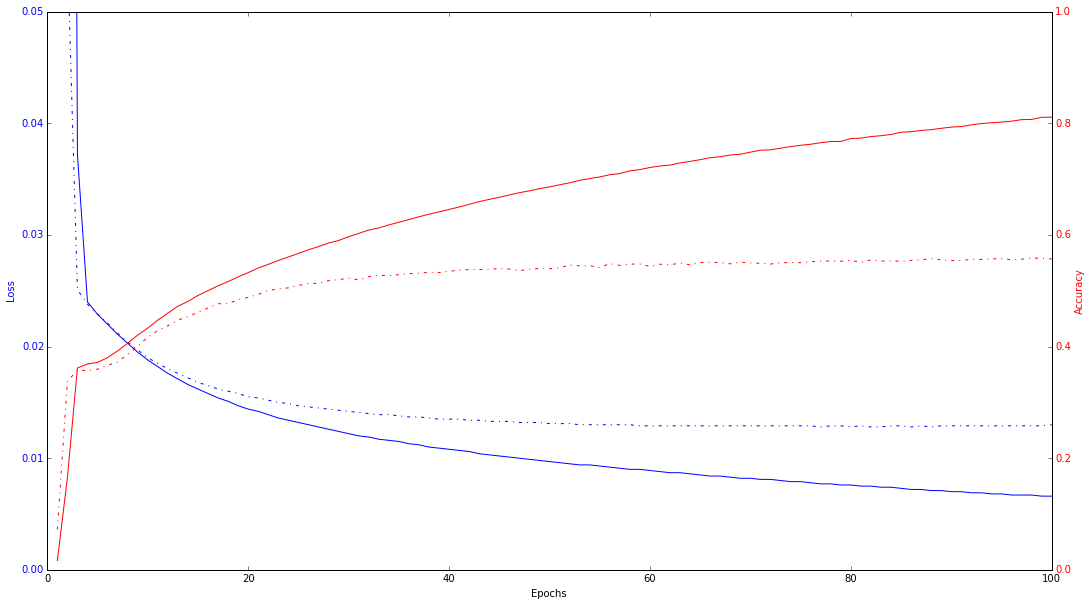

In [13]:
with open('../logs/training_e01.log', 'r') as f:
    txt = f.read()
    
plot_on_training(txt, max_loss=0.05, max_epochs=100, batch_size=393)

Epoch 100:
```

```